# Data Science 2 (modeling), BFVM19DATASC2

## Multivariate Component Analysis computer-exam '20-'21 resit

### Tsjerk A. Wassenaar (WATS), *06-17031440*

#### Instructions

On your workstation desktop you will find all required files:

* This exam `BFVM19DATASC2_H_DataScience2_MCA_WATS.ipynb`

* Data files
  - `GSE123818_Root_single_cell_wt_datamatrix.fixednames.transposed.csv.gz`
  - `GSE123818_Root_single_cell_wt_datamatrix.fixednames.transposed.csv.gz`

In addition, some supplementary reference materials are included:

* Jupyter notebooks `*.ipynb` and `*.html`
* Book chapters and cheat sheets `*.pdf`

Provide your answers in the code cells corresponding with each of the questions below. For those questions that require a textual answer rather than python code, you may either type your answer in the cell using a python comment or insert a text-markdown cell with your typeset answer.

All questions have the possible number of points to be scored indicated. Your grade will be calculated as follows:

$$
\text{Grade} = 1 + 9 \cdot \frac {\text{Points Scored}} {\text{Maximum Score}}
$$

Instructions on how to submit your answers are provided at the bottom. All notes, textbooks and other written reference materials are permitted.

## Assignment 1: Factor Analysis

The data files `GSE123818_Root_single_cell_wt_datamatrix.fixednames.transposed.csv.gz` and `GSE123818_Root_single_cell_wt_datamatrix.fixednames.transposed.csv.gz` contain single cell RNA sequence expression profiles from root cells from Arabidopsis wild-type (wt) and a mutant (shr). The data belong to the paper `Spatiotemporal Developmental Trajectories in the Arabidopsis Root Revealed Using High-Throughput Single-Cell RNA Sequencing` from Denyer _et al._ (Developmental Cell 48(6):840-852, 2019) and were corrected/adapted and made available on Zenodo (DOI:10.5281/zenodo.4597857) for a UMAP tutorial. An important aspect of this dataset is that the cells comprise different developmental stages and can thus be used to assess pathways of cell differentation.

**Assignment:**

- Read the data in from both files and combine them using the concatenate function from numpy (`z = np.concatenate((wt, shr))`). **Exclude the labels in the first column!**

- Select a subset of the columns, such that there are as many features as there are cells (rows)

- Perform FA

**Assessment:**

- Correct application of FA, with justification of choices, including the selection of columns, normalization or not and log transformation or not.

- Proper graphical representations

- Assessment and interpretation of principal components / factors

- Interpretation of and reflection on results

In [2]:
import pandas as pd

wt = pd.read_csv('GSE123818_Root_single_cell_wt_datamatrix.fixednames.transposed.csv.gz')
shr = pd.read_csv('GSE123818_Root_single_cell_shr_datamatrix.fixednames.transposed.csv.gz')

wt.head()

,Unnamed: 0,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,T25K16-7,AT1G01080,AT1G01090,...,ATCG01120,ATCG01130,ATCG01230,ATCG01240,ATCG01250,ATCG01270,ATCG01280,ATCG01300,ATCG01310,GFP
0,AAACCTGCACTTAACG-1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,AAACCTGCAGGACGTA-1,0,1,0,0,3,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,AAACCTGTCAGGTAAA-1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,AAACGGGCAATAGAGT-1,0,1,0,1,89,1,0,0,20,...,0,5,0,0,0,0,0,0,0,0
4,AAACGGGCACTTGGAT-1,1,4,1,1,57,2,0,0,8,...,0,2,0,0,0,0,0,0,0,0


In [5]:
import numpy as np
X = np.concatenate((wt.iloc[:, 1:], shr.iloc[:, 1:]))

In [6]:
# Select the len(X) columns with highest variance
X = X[:, X.var(axis=0).argsort()[::-1][:len(X)]]

# Gene counts, so log transform and normalize
X = np.log(1 + X)
X -= X.mean(axis=0)
X /= X.std(axis=0)

In [8]:
vals, vecs = np.linalg.eigh(np.cov(X.T))
vals = vals[::-1]
vecs = vecs[:, ::-1]



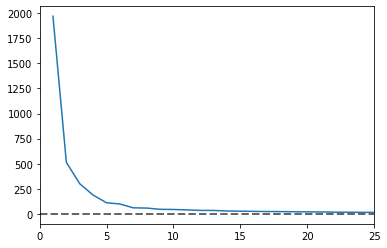

In [13]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(vals)) + 1, vals)
plt.xlim((0, 25))
plt.axhline(0, c='#666666', zorder=0, linewidth=2, linestyle='--')
plt.show()

In [ ]:
Z = X @ vecs[:, :10]

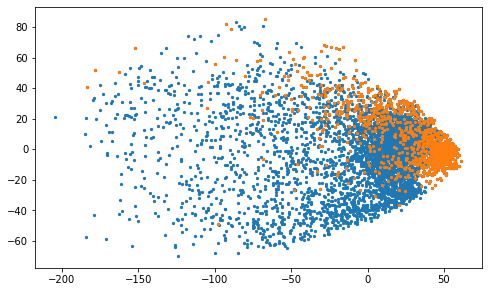

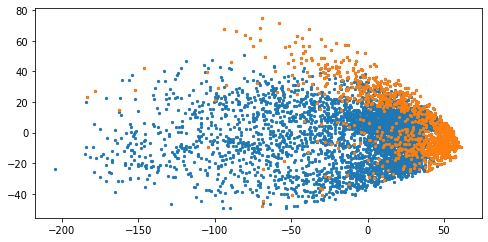

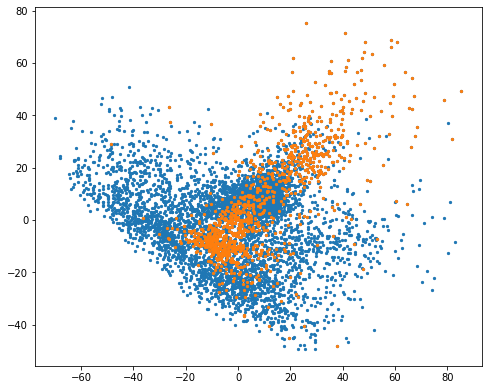

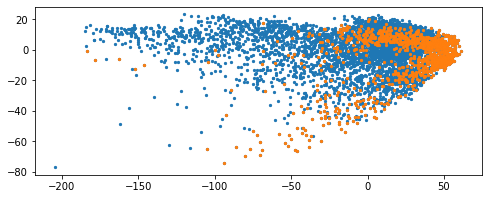

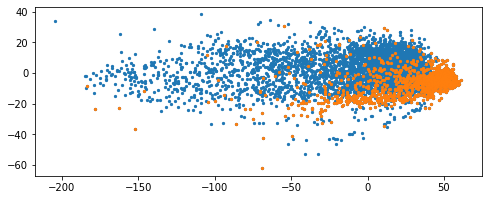

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
plt.scatter(*Z[:, :2].T, s=5)
plt.scatter(*Z[len(wt):, :2].T, s=5)
plt.show()

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
plt.scatter(*Z[:, [0, 2]].T, s=5)
plt.scatter(*Z[len(wt):, [0, 2]].T, s=5)
plt.show()

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
plt.scatter(*Z[:, [1, 2]].T, s=5)
plt.scatter(*Z[len(wt):, [1, 2]].T, s=5)
plt.show()

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
plt.scatter(*Z[:, [0, 3]].T, s=5)
plt.scatter(*Z[len(wt):, [0, 3]].T, s=5)
plt.show()

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
plt.scatter(*Z[:, [0, 4]].T, s=5)
plt.scatter(*Z[len(wt):, [0, 4]].T, s=5)
plt.show()



Ooh, so many interpretations possible. Most important is that a principal component here is a collective pattern of expression of genes (RNA). It helps to know that the root cells have different developmental stages. The patterns, especially in `shr` in the projections on components 1 and 4 can then be understood as pathways in the development.

## Assignment 2: Linear Discriminant Analysis


Assignment:

- Perform linear discriminant analysis on the two datasets from assignment 1
- Assess whether and why the groups are well separable or not and how this relates to (the results from) PCA/FA 

Assessment:

- Correct application of LDA
- Proper graphical representations
- Assessment and interpretation of discriminant axis
- Interpretation of and reflection on results

In [24]:
A = X[:len(wt)]
B = X[len(wt):]

Sp = ((len(A) - 1) * np.cov(A.T) + (len(B) - 1) * np.cov(B.T)) / (len(X) - 2)
Sinv = np.linalg.inv(Sp)

a = Sinv @ (A.mean(axis=0) - B.mean(axis=0))
a /= (a ** 2).sum() ** 0.5

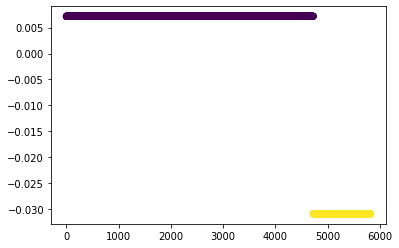

In [25]:
plt.scatter(np.arange(len(X)), X @ a, c = np.arange(len(X)) > len(wt))
plt.show()

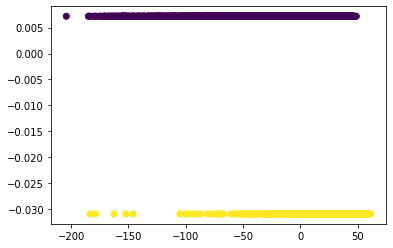

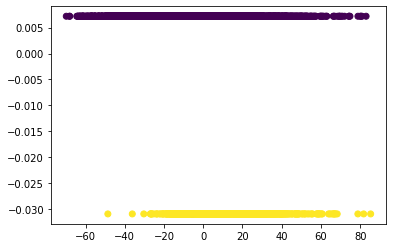

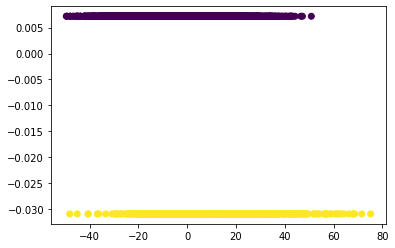

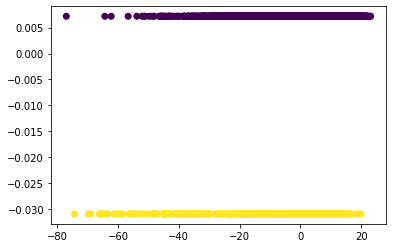

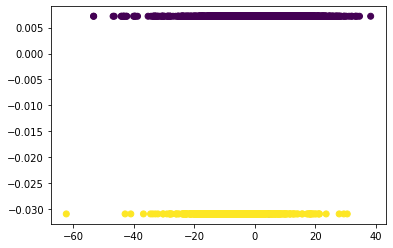

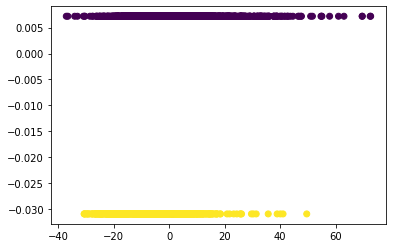

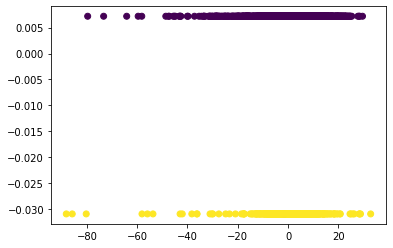

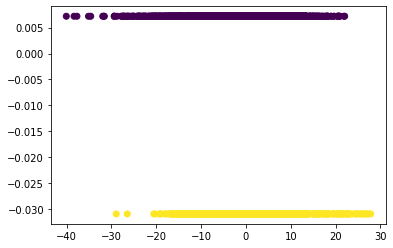

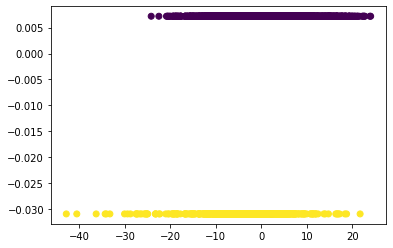

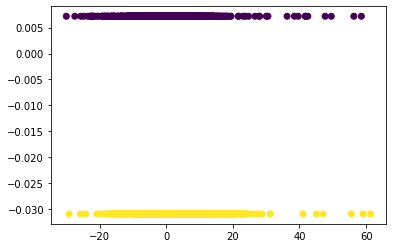

In [27]:
for i in range(10):
    plt.scatter(Z[:, i], X @ a, c = np.arange(len(X)) > len(wt))
    plt.show()

The two datasets are very well separable, although this does not show as such in the PCA results. The reason is that the mutant affects specific expressions, which are picked up in LDA, but which are relatively unimportant in determining the components.

***

<div class="alert alert-warning">
<b>After finishing:</b>
<ol><li>
Rename your notebook with your name and student number, like `JohnDoe_123456`, using the menu option `File` > `Rename`.
</li><li>
Evaluate the notebook by means of the menu option `Kernel` > `Restart & Run All` and check that your notebook runs without errors.
</li><li>
Save the evaluated notebook using the menu option `File` > `Save and Checkpoint`.
</li><li>
Open a terminal, change to the desktop folder using `cd ~/Desktop`, and submit your work using a command like `submit_your_work 123456 JohnDoe_123456.ipynb` (enter `submit_your_work --help` to get help on submit script usage).
</li><li>
After getting clearance from the person monitoring the exam, you are free to leave.
</li></ol>
</div>

#### Success!